# 1. Problem Definition

> To predict whether a passenger survives the historic Titanic Shipwreck.

# 2. Data

The data for the machine learning project is obtained from Kaggle practice tournaments.
The total data is divided into train and test data. 

**Training set (train.csv)**- The training set is used to build the machine learning models. Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.


**Test set (test.csv)**- The test set is used to see how well your model performs on unseen data. For the test set, the ground truth for each passenger is not provided.

# 3. Evaluation

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

# 4. Features

**survival**- Survival(0 = No, 1 = Yes)<br><br>
**pclass**-	Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)<br><br>
**sex**-	Sex<br><br>
**Age**-	Age in years<br>	
**sibsp**-	# of siblings / spouses aboard the Titanic<br>	
**parch**-	# of parents / children aboard the Titanic<br>	
**ticket**-	Ticket number<br>	
**fare**-	Passenger fare<br>	
**cabin**-	Cabin number<br>	
**embarked**-	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>


**Variable Notes**

>pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [1]:
# Importing the required tools

# Regular exploratory data analysis (EDA) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

# Preprocessing sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
train = pd.read_csv("C:data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Checking missing values
total = train.isna().sum().sort_values(ascending=False)
percent = round((train.isna().sum()/train.isna().count())*100, 2)
missing_values = pd.DataFrame({"Total": total, "%": percent})
missing_values

,Total,%
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22
Fare,0,0.00
Name,0,0.00
Parch,0,0.00
PassengerId,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00


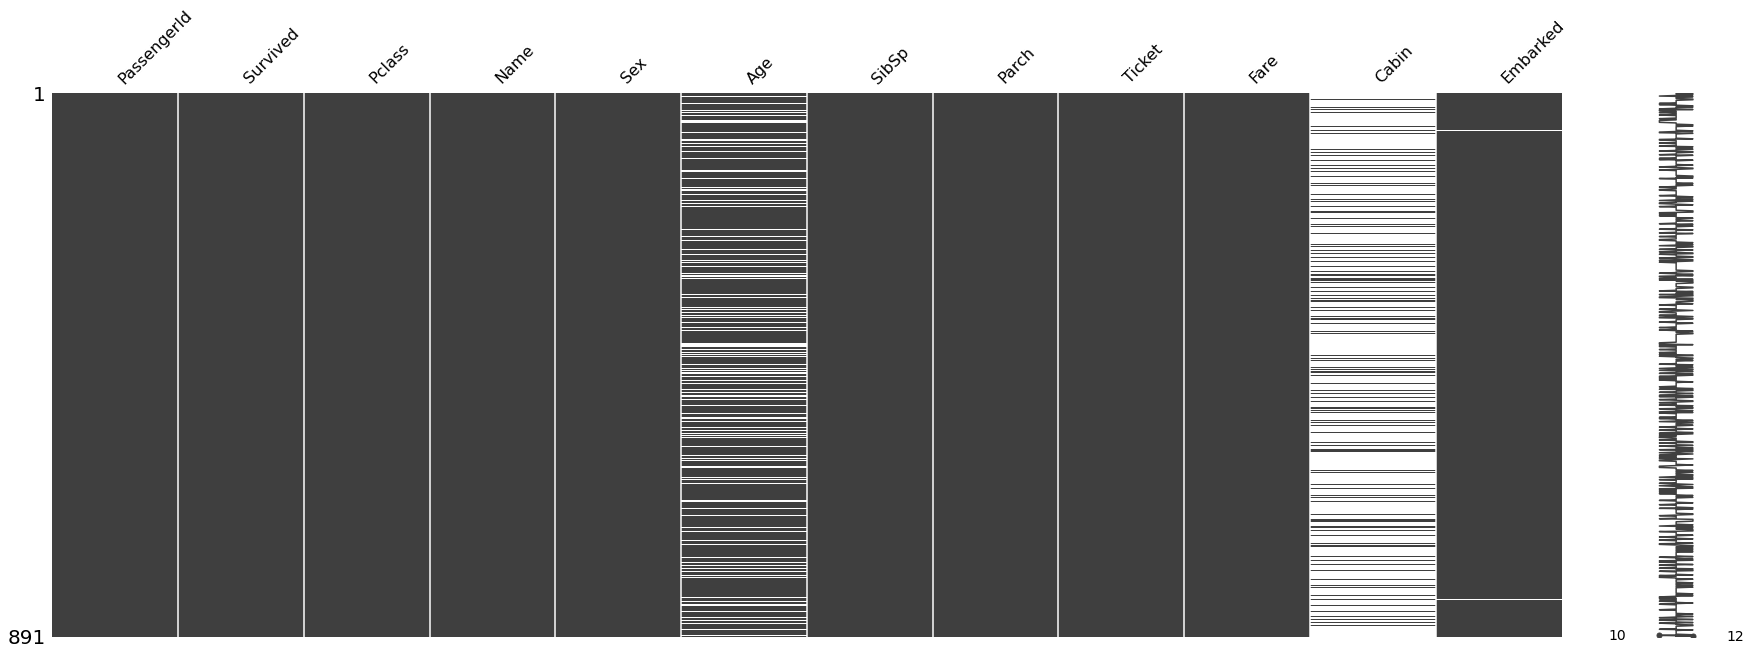

In [5]:
# Plotting missing values for better visualisation
missingno.matrix(train, figsize = (30,10));

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Choosing relevant features for further analysis
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]
df = train[features]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Exploratory Data Analysis (EDA)

In [10]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


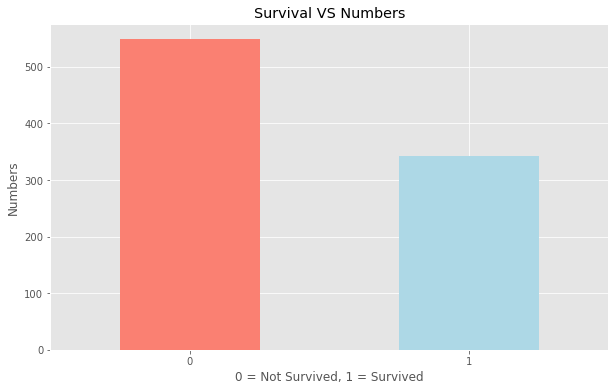

In [11]:
# Plot showing the no. of persons survived
plt.style.use("ggplot")
df["Survived"].value_counts().plot(kind = "bar",
                                         figsize = (10, 6),
                                         color = ["salmon", "lightblue"])
plt.title("Survival VS Numbers")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Numbers")
plt.xticks(rotation = 0);

In [12]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


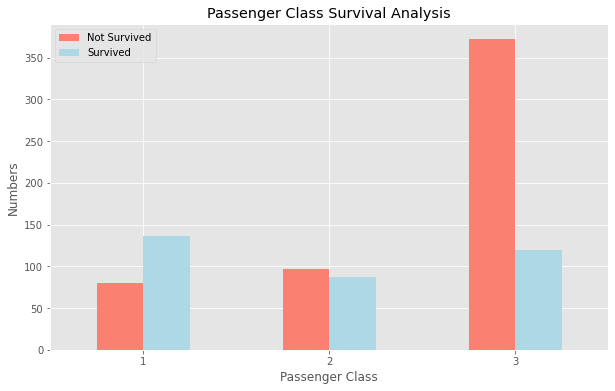

In [13]:
# Plot showing survival from different passenger class
pd.crosstab(df.Pclass, df.Survived).plot(kind = "bar",
                                         figsize = (10,6),
                                         color = ["salmon", "lightblue"])
plt.title("Passenger Class Survival Analysis")
plt.xlabel("Passenger Class")
plt.ylabel("Numbers")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation = 0);

In [14]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


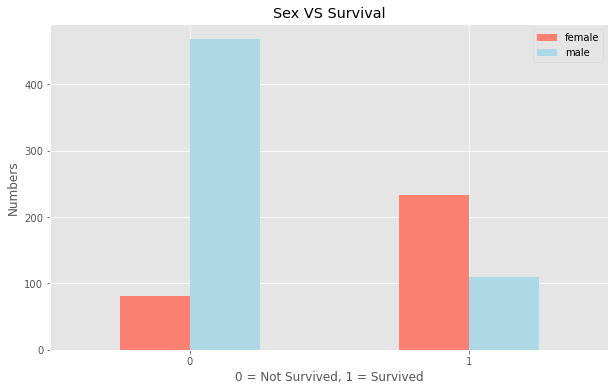

In [15]:
# Plot showing realation of survival with sex
pd.crosstab(df.Survived, df.Sex).plot(kind = "bar",
                                                  figsize = (10, 6),
                                                  color = ["salmon", "lightblue"]);
plt.title("Sex VS Survival")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Numbers")
plt.legend()
plt.xticks(rotation = 0);

In [16]:
# Separating data of men and women
women = df[df["Sex"] == "female"]
women = women.dropna(subset = ["Age"])
men = df[df["Sex"] == "male"]
men = men.dropna(subset = ["Age"])

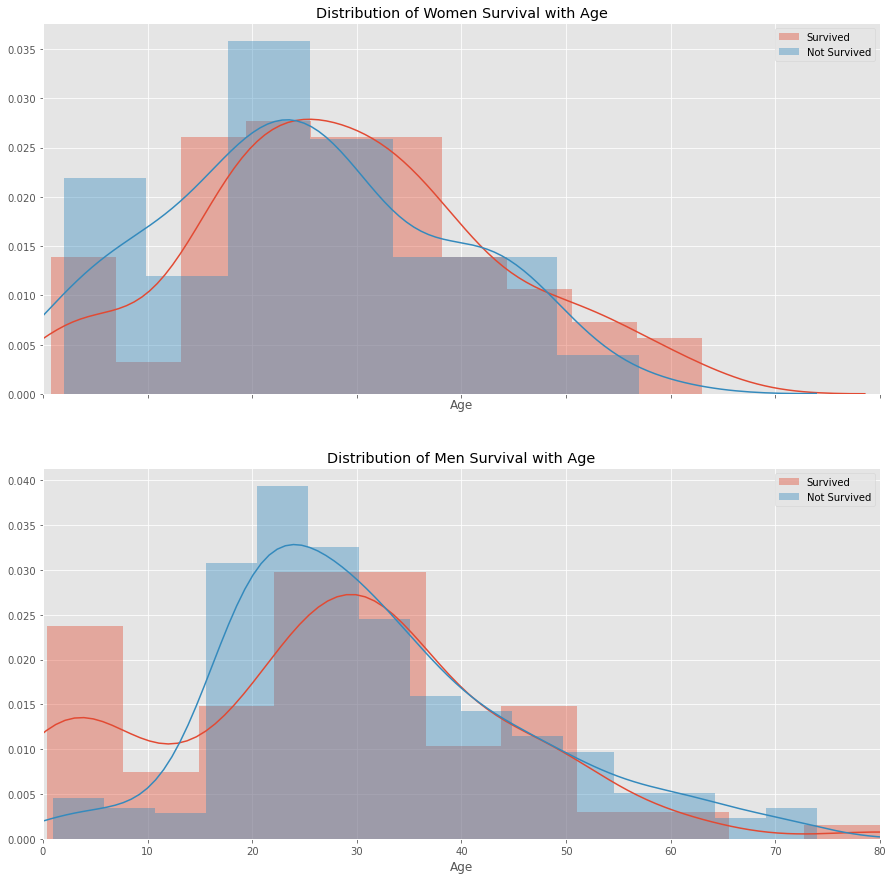

In [17]:
# Plotting distribution of Survival depending on age of men and women
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (15,15))

ax0 = sns.distplot(women.Age[women.Survived == 1],
                   ax = ax0,
                   label = ["Survived"])
ax0 = sns.distplot(women.Age[women.Survived == 0],
                   ax = ax0,
                   label = ["Not Survived"])
ax0.legend()
ax0.set_xlim([0, 80])
ax0.set(title = "Distribution of Women Survival with Age")

ax1 = sns.distplot(men.Age[men.Survived == 1],
                   ax = ax1,
                   label = ["Survived"])
ax1 = sns.distplot(men.Age[men.Survived == 0],
                   ax = ax1,
                   label = ["Not Survived"])
ax1.legend()
ax1.set_xlim([0, 80])
ax1.set(title = "Distribution of Men Survival with Age");

In [18]:
pd.crosstab(df["Survived"], df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


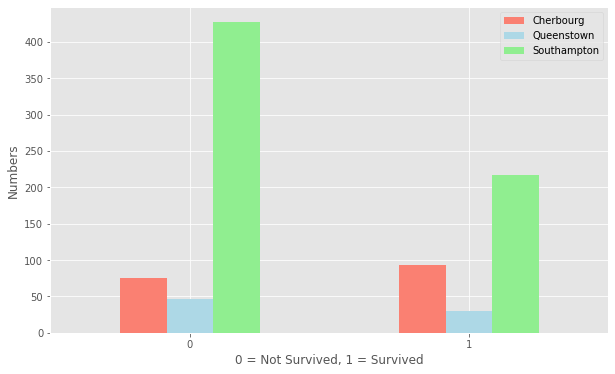

In [19]:
# Plotting the survival of passengers from different Embarkments
pd.crosstab(df["Survived"], df["Embarked"]).plot(kind = "bar",
                                                 figsize = (10, 6),
                                                 color = ["salmon", "lightblue", "lightgreen"])
plt.legend(["Cherbourg", "Queenstown", "Southampton"])
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Numbers")
plt.xticks(rotation = 0);

## Filling Missing Values

In [20]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [21]:
# Filling missing values
df["Age"].fillna(df["Age"].mean(), inplace = True)
df["Embarked"].fillna("S", inplace = True)

In [22]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Feature Engineering

In [23]:
# Categorising age into categories
bins = [0, 15, 40, 60, 80]
labels = ["Children", "Young", "Old", "Very Old"]
df["Age_group"] = pd.cut(df["Age"], bins = bins, labels = labels, include_lowest = True)
df.drop("Age", axis = 1, inplace = True)

In [24]:
# Categorising fare into 10 categories
fare_bins = [0, 50, 100, 550]
fare_labels = ["Low", "Medium", "High"]
df["Fare_group"] = pd.cut(df["Fare"], bins = fare_bins, labels = fare_labels, include_lowest = True)
df.drop("Fare", axis = 1, inplace = True)

In [25]:
df.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Age_group,Fare_group
0,3,male,1,0,S,0,Young,Low
1,1,female,1,0,C,1,Young,Medium
2,3,female,0,0,S,1,Young,Low
3,1,female,1,0,S,1,Young,Medium
4,3,male,0,0,S,0,Young,Low


## Splitting data into dependant and independant variables (x & y)

In [26]:
# Splitting into x & y
x = df.drop("Survived", axis = 1)
y = df["Survived"]

## Converting non-numerical variables to numerical values

In [27]:
# Converting categorical to object datatype
df["Age_group"] =df["Age_group"].astype(object)
df["Fare_group"] = df["Fare_group"].astype(object)

In [28]:
df.dtypes

Pclass         int64
Sex           object
SibSp          int64
Parch          int64
Embarked      object
Survived       int64
Age_group     object
Fare_group    object
dtype: object

In [29]:
df.isna().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
Survived      0
Age_group     0
Fare_group    0
dtype: int64

In [30]:
# Encoding using scikitlearn to numerical values
categorical_features = ["Pclass", "Sex", "Embarked", "Age_group", "Fare_group"]
one_hot = OneHotEncoder()
ct = ColumnTransformer(transformers = [("one_hot", one_hot, categorical_features)], remainder = "passthrough")
x= ct.fit_transform(x)
x

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [31]:
x.shape

(891, 17)

## Modelling

In [32]:
# Split the data into train and test splits

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [33]:
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 2., 0.],
       [1., 0., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 1., 0., 1.]])

### Machine Learning Models going to be tried:

* Linear SVC
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Gradient Boosting Classifier

In [34]:
models ={
    "Linear SVC": LinearSVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

def model_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and scores on different model
    '''
    
    np.random.seed(12)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [35]:
# Fitting the data to find best model
scores = model_score(models = models,
            x_train = x_train,
            x_test = x_test,
            y_train = y_train,
            y_test = y_test)
scores

{'Linear SVC': 0.8100558659217877,
 'Logistic Regression': 0.7988826815642458,
 'Decision Tree Classifier': 0.8435754189944135,
 'Random Forest Classifier': 0.8324022346368715,
 'Gradient Boosting Classifier': 0.8156424581005587}

### Model Comparison

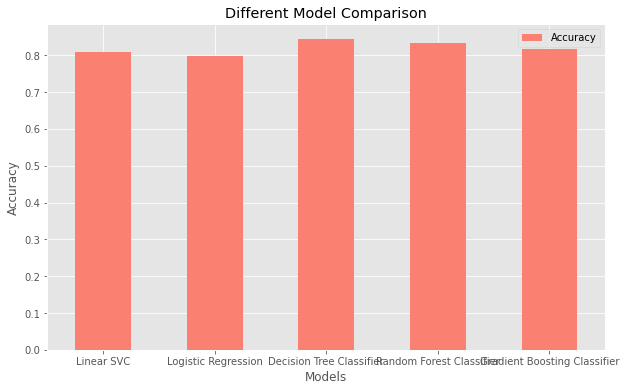

In [36]:
# Visualising and comparing different models
model_compare = pd.DataFrame(scores, index=["Accuracy"])
model_compare.T.plot(kind = "bar",
                     figsize = (10, 6),
                     color= ["salmon"])
plt.xticks(rotation = 0)
plt.title("Different Model Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy");

In [37]:
# Best model
np.random.seed(12)
ideal_model = DecisionTreeClassifier()
ideal_model.fit(x_train, y_train)
ideal_model.score(x_test, y_test)

0.8435754189944135

In [38]:
# Making the predictions
y_preds = ideal_model.predict(x_test)

In [39]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[97,  8],
       [20, 54]], dtype=int64)

# Make Predictions on Test Data

In [40]:
# Load test data

test = pd.read_csv("C:data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
# Selecting the relevant features
test_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_test = test[test_features]
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [42]:
# Checking for missing values
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [43]:
df_test["Fare"].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [44]:
# Filling the missing values
df_test["Age"].fillna(df_test["Age"].mean(), inplace = True)
df_test["Fare"].fillna(7.7500, inplace = True)

In [45]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [47]:
# Categorising age into groups
bins = [0, 15, 40, 60, 80]
labels = ["Children", "Young", "Old", "Very Old"]
df_test["Age_group"] = pd.cut(df_test["Age"], bins = bins, labels = labels, include_lowest = True)
df_test.drop("Age", axis = 1, inplace = True)

In [48]:
# Categorising fares into groups
fare_bins = [0, 50, 100, 550]
fare_labels = ["Low", "Medium", "High"]
df_test["Fare_group"] = pd.cut(df_test["Fare"], bins = fare_bins, labels = fare_labels, include_lowest = True)
df_test.drop("Fare", axis = 1, inplace = True)

In [49]:
df_test["Age_group"] =df_test["Age_group"].astype(object)
df_test["Fare_group"] = df_test["Fare_group"].astype(object)

In [50]:
# Converting categorical to numerical values
categorical_features = ["Pclass", "Sex", "Embarked", "Age_group", "Fare_group"]
one_hot = OneHotEncoder()
ct = ColumnTransformer(transformers = [("one_hot", one_hot, categorical_features)], remainder = "passthrough")
df_test= ct.fit_transform(df_test)
df_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [51]:
# Confirming both the dataframes shapes are same
x.shape, df_test.shape

((891, 17), (418, 17))

In [52]:
# Make predictions on test data

test_preds = ideal_model.predict(df_test)

In [54]:
# Making predictions into the required submission format
df_preds = pd.DataFrame()
df_preds["PassengerId"] = test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Export to csv

df_preds.to_csv("C:Submissions/submission_7.csv", index = False)